# 1. Data Understanding 

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). 

The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

Variables obtained :
Family history with overweight, Gender, Age, Height and Weight

NObesity values are:

•Underweight Less than 18.5

•Normal 18.5 to 24.9

•Overweight 25.0 to 29.9

•Obesity I 30.0 to 34.9

•Obesity II 35.0 to 39.9

•Obesity III Higher than 40



Evaluation
Submissions are evaluated using the accuracy score.

Submission File
For each id row in the test set, you must predict the class value of the target, NObeyesdad. The file should contain a header and have the following format:

id,NObeyesdad
20758,Normal_Weight
20759,Normal_Weight
20760,Normal_Weight
etc.

# 2. Import packages and data 

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.9 MB/s eta 0:00:0000:0100:0

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from ISLP import confusion_table
from ISLP.models import (ModelSpec as MS, summarize, contrast)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [3]:
# get directory for data 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [4]:
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

In [5]:

print("Train shape:", train.shape)
print("=========================================")
print("Test  shape:", test.shape)
print("=========================================")
print("\nTrain info:")
train.info()

Train shape: (20758, 18)
Test  shape: (13840, 17)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                          

In [6]:
train. head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
# set variable types and check for missing values and 0s 
cat_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

num_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

target = ['NObeyesdad']

train[cat_vars] = train[cat_vars].astype('category')
test[cat_vars] = test[cat_vars].astype('category')
train[target] = train[target].astype('category')



In [8]:
# calulate BMI to add to varibles 

for df in (train, test):
    df['BMI'] = df['Weight'] / (df['Height']**2)

# Register BMI as numeric
if 'BMI' not in num_vars:
    num_vars.append('BMI')

# 3. Start EDA 

In [9]:
# Numeric summary
print("\nNumeric summary (train):")
print(train[num_vars].describe())



Numeric summary (train):
                Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE           BMI  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756     30.241842  
std        0.608467      0.838302      0.602113      8.333932  
min   

In [10]:
# Missingness checks
print("\nMissing values per column (train):")
print(train.isna().sum())
print("\nMissing values per column (test):")
print(test.isna().sum())


Missing values per column (train):
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

Missing values per column (test):
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC            


Target distribution (counts):
NObeyesdad         
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

Target distribution (proportions):
NObeyesdad         
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64


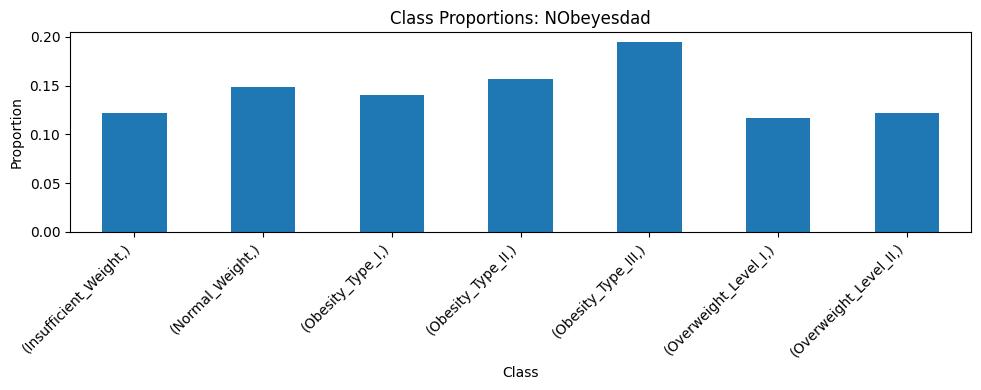

In [11]:
# Target distribution
print("\nTarget distribution (counts):")
print(train[target].value_counts())
print("\nTarget distribution (proportions):")
print(train[target].value_counts(normalize=True))

print("====================================================")
# Bar chart of target distribution
plt.figure(figsize=(10,4))
(train[target].value_counts(normalize=True)
     .sort_index()
     .plot(kind='bar'))
plt.title("Class Proportions: NObeyesdad")
plt.ylabel("Proportion")
plt.xlabel("Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

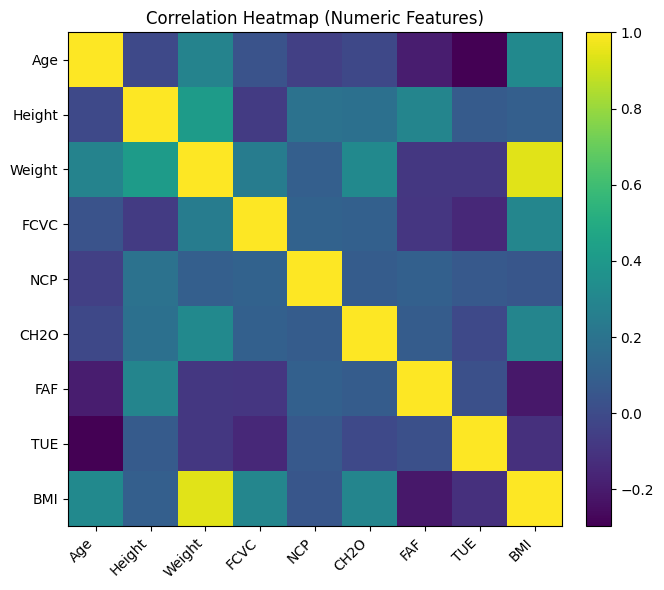

In [12]:
# Correlations among numeric features
corr = train[num_vars].corr()
plt.figure(figsize=(7,6))
im = plt.imshow(corr, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_vars)), num_vars, rotation=45, ha='right')
plt.yticks(range(len(num_vars)), num_vars)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

In [13]:
# Class-wise numeric means
group_means = train.groupby(target)[num_vars].mean()
print("\nClass-wise means of numeric features:")
display(group_means)


Class-wise means of numeric features:


/tmp/ipykernel_36/3968585446.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = train.groupby(target)[num_vars].mean()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
NObeyesdad,,,,,,,,,
Insufficient_Weight,19.336502,1.683693,49.860773,2.479756,2.919554,1.744163,1.201782,0.802901,17.583619
Normal_Weight,20.801388,1.670744,61.533289,2.372249,2.889552,1.806204,1.189580,0.630216,22.000999
Obesity_Type_I,25.023615,1.693509,92.371026,2.097052,2.454551,2.129783,0.922710,0.739477,32.154649
Obesity_Type_II,27.707128,1.782715,115.995914,2.425227,2.798439,1.985064,1.029579,0.415601,36.521958
Obesity_Type_III,24.126847,1.676007,117.697452,3.000000,2.999950,2.332338,0.549225,0.548849,41.781745
Overweight_Level_I,23.045197,1.686880,74.228266,2.256583,2.528178,2.069366,1.134657,0.557014,26.059270
Overweight_Level_II,26.032084,1.706163,82.085513,2.224499,2.594109,2.004470,1.060895,0.697984,28.192491


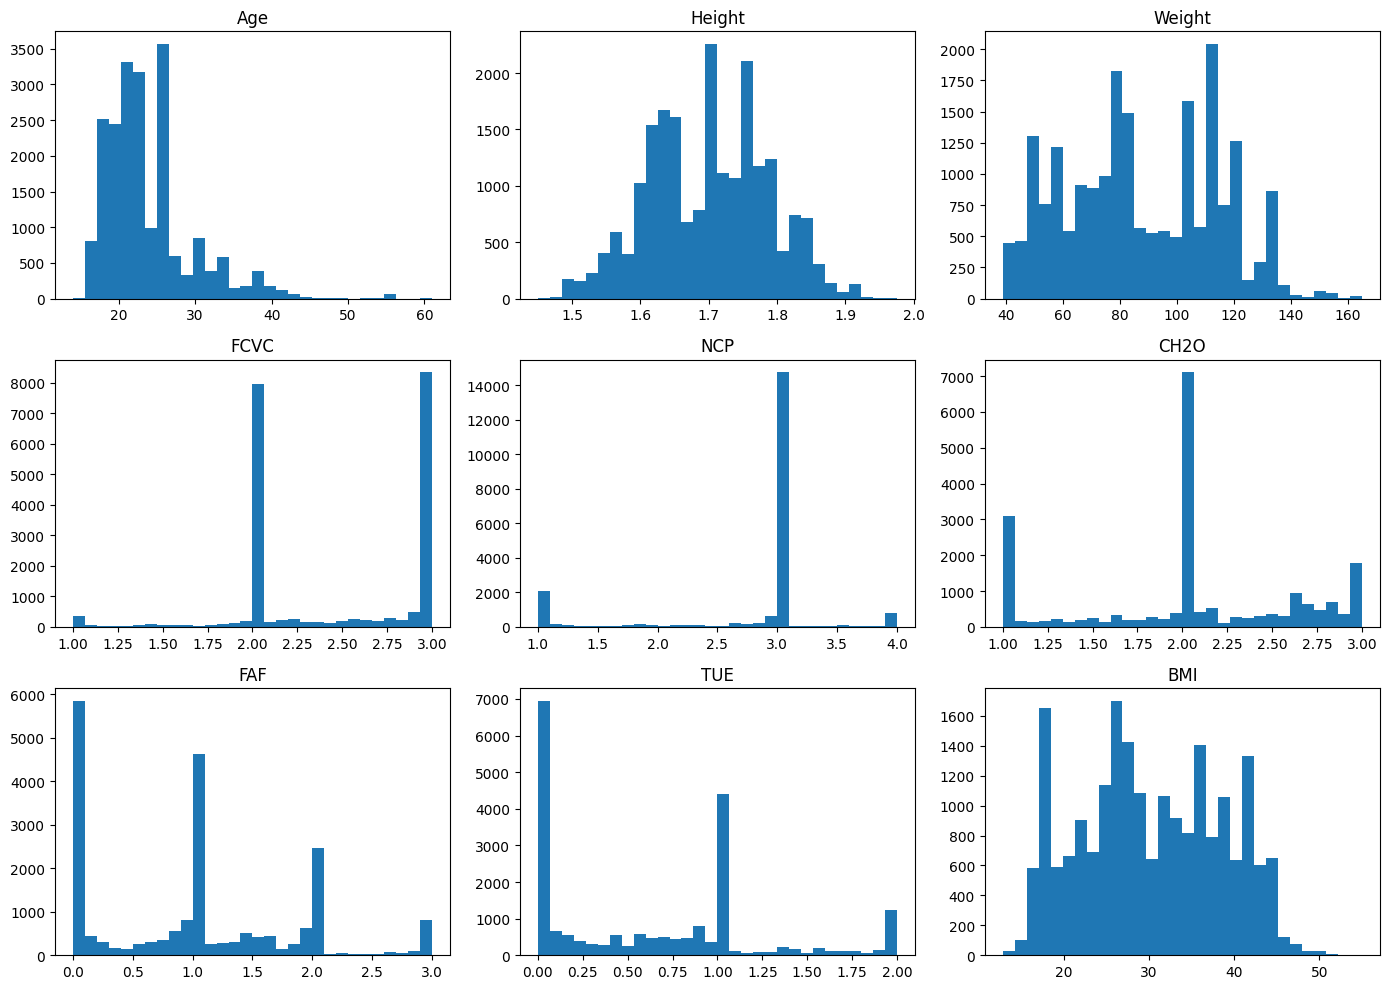

In [14]:
# Univariate histograms
fig, axes = plt.subplots(3, 3, figsize=(14,10))
axes = axes.ravel()
for i, col in enumerate(num_vars):
    axes[i].hist(train[col].values, bins=30)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# 4. Design Matrices 

In [15]:
# Build explicit contrasts for each categorical (treatment coding)
encoded_cats = [contrast(v, 'drop') for v in cat_vars]

# 3) Assemble ModelSpec terms (categorical contrasts + numeric features)
all_terms = encoded_cats + num_vars

# 4) Fit the design on TRAIN+TEST predictors to capture ALL category levels
design = MS(all_terms, intercept=True)
predictor_cols = cat_vars + num_vars
combined_predictors = pd.concat([train[predictor_cols], test[predictor_cols]], ignore_index=True)
_ = design.fit(combined_predictors)

# 5) Transform TRAIN and TEST -> fully numeric design matrices
X_full      = design.transform(train[predictor_cols]) 
X_test_full = design.transform(test[predictor_cols])
y_full      = train[target]

# 6) Train/Valid split (stratified) using row indices so matrices stay aligned
from sklearn.model_selection import train_test_split
idx_train, idx_valid = train_test_split(
    np.arange(train.shape[0]),
    test_size=0.20,
    stratify=y_full,
    random_state=42
)
X_train = X_full.iloc[idx_train].copy()
X_valid = X_full.iloc[idx_valid].copy()
y_train = y_full.iloc[idx_train].copy()
y_valid = y_full.iloc[idx_valid].copy()

# 7) Drop ISLP 'intercept' 
if 'intercept' in X_train.columns:
    X_train_no_int = X_train.drop(columns=['intercept'])
    X_valid_no_int = X_valid.drop(columns=['intercept'])
    X_full_no_int  = X_full.drop(columns=['intercept'])
    X_test_no_int  = X_test_full.drop(columns=['intercept'])
else:
    X_train_no_int = X_train
    X_valid_no_int = X_valid
    X_full_no_int  = X_full
    X_test_no_int  = X_test_full


# 5. Models 

In [16]:
# standardize for Logit and SVM 
logit_clf = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', LogisticRegression(
        multi_class='multinomial', solver='lbfgs', max_iter=2000, n_jobs=None, random_state=42
    ))
])

lda_clf = LDA(store_covariance=True, solver='svd')  
nb_clf  = GaussianNB()                             
svm_clf = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', SVC(kernel='rbf', C=3.0, gamma='scale', probability=True, random_state=42))
])

models = {
    'logit_multinomial': logit_clf,
    'lda': lda_clf,
    'naive_bayes': nb_clf,
    'svm_rbf': svm_clf
}

# Add shrinkage LDA variant (uses Ledoit–Wolf)
models['lda_shrink'] = LDA(solver='lsqr', shrinkage='auto')

# 6. View results 

In [17]:
results = []

def get_estimator(m):
    # works for Pipeline or bare estimator
    return m.named_steps['model'] if hasattr(m, 'named_steps') else m

# ensure 1D string labels 
y_train_1d = y_train.astype(str).to_numpy()
y_valid_1d = y_valid.astype(str).to_numpy()
y_full_1d  = y_full.astype(str).to_numpy()

for name, mdl in models.items():
    print(f"\n=== Fitting: {name} ===")

    # Fit
    mdl.fit(X_train_no_int, y_train_1d)

    # Predict labels
    y_pred = mdl.predict(X_valid_no_int)
    acc = accuracy_score(y_valid_1d, y_pred)
    print(f"Validation Accuracy: {acc:.4f}")

    # ISLP confusion table (rows=Predicted, cols=Truth)
    print("\nConfusion Table (rows=Predicted, cols=Truth):")
    C = confusion_table(y_pred, y_valid_1d)
    display(C)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_valid_1d, y_pred, digits=3))

    # Macro AUC (One-vs-Rest)
    macro_auc = np.nan
    est = get_estimator(mdl)
    if hasattr(est, "predict_proba"):
        y_proba = mdl.predict_proba(X_valid_no_int)
        classes_est = np.array([str(c) for c in est.classes_])  # order matches proba columns
        y_valid_bin = label_binarize(y_valid_1d, classes=classes_est)
        try:
            macro_auc = roc_auc_score(y_valid_bin, y_proba, average='macro')
            print(f"Macro ROC AUC (OvR): {macro_auc:.4f}")
        except Exception as e:
            print("AUC not computed:", e)

    # 5-fold CV accuracy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(mdl, X_full_no_int, y_full_1d, cv=cv, scoring='accuracy')
    print(f"5-Fold CV Accuracy: mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}")

    results.append({
        'model': name,
        'val_accuracy': acc,
        'cv_mean_acc': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'macro_auc_ovr': macro_auc
    })

results_df = pd.DataFrame(results).sort_values(by='val_accuracy', ascending=False)
print("\n=== Model Comparison (Validation) ===")
display(results_df)


=== Fitting: logit_multinomial ===
Validation Accuracy: 0.8704

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,478,56,1,0,0,1,0
Normal_Weight,26,504,0,0,0,45,3
Obesity_Type_I,0,2,492,21,0,15,80
Obesity_Type_II,0,0,35,626,1,0,8
Obesity_Type_III,0,0,4,0,807,0,0
Overweight_Level_I,1,46,10,0,1,348,54
Overweight_Level_II,0,9,40,3,0,76,359



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.892     0.947     0.918       505
      Normal_Weight      0.872     0.817     0.844       617
     Obesity_Type_I      0.807     0.845     0.826       582
    Obesity_Type_II      0.934     0.963     0.948       650
   Obesity_Type_III      0.995     0.998     0.996       809
 Overweight_Level_I      0.757     0.718     0.737       485
Overweight_Level_II      0.737     0.712     0.725       504

           accuracy                          0.870      4152
          macro avg      0.856     0.857     0.856      4152
       weighted avg      0.869     0.870     0.869      4152

Macro ROC AUC (OvR): 0.9807
5-Fold CV Accuracy: mean=0.8653, std=0.0044

=== Fitting: lda ===
Validation Accuracy: 0.8319

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,480,94,1,0,0,2,0
Normal_Weight,23,448,1,0,0,51,6
Obesity_Type_I,0,1,445,31,3,17,69
Obesity_Type_II,0,0,58,609,8,0,5
Obesity_Type_III,0,0,10,6,798,0,0
Overweight_Level_I,1,55,13,0,0,317,67
Overweight_Level_II,1,19,54,4,0,98,357



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.832     0.950     0.887       505
      Normal_Weight      0.847     0.726     0.782       617
     Obesity_Type_I      0.786     0.765     0.775       582
    Obesity_Type_II      0.896     0.937     0.916       650
   Obesity_Type_III      0.980     0.986     0.983       809
 Overweight_Level_I      0.700     0.654     0.676       485
Overweight_Level_II      0.670     0.708     0.689       504

           accuracy                          0.832      4152
          macro avg      0.816     0.818     0.815      4152
       weighted avg      0.832     0.832     0.830      4152

Macro ROC AUC (OvR): 0.9746
5-Fold CV Accuracy: mean=0.8279, std=0.0067

=== Fitting: naive_bayes ===
Validation Accuracy: 0.6932

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,473,171,1,0,0,7,0
Normal_Weight,26,346,4,0,0,54,14
Obesity_Type_I,1,24,298,13,1,189,212
Obesity_Type_II,0,2,227,629,1,12,85
Obesity_Type_III,2,17,5,0,806,9,1
Overweight_Level_I,3,36,9,3,1,155,21
Overweight_Level_II,0,21,38,5,0,59,171



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.725     0.937     0.818       505
      Normal_Weight      0.779     0.561     0.652       617
     Obesity_Type_I      0.404     0.512     0.452       582
    Obesity_Type_II      0.658     0.968     0.783       650
   Obesity_Type_III      0.960     0.996     0.978       809
 Overweight_Level_I      0.680     0.320     0.435       485
Overweight_Level_II      0.582     0.339     0.429       504

           accuracy                          0.693      4152
          macro avg      0.684     0.662     0.649      4152
       weighted avg      0.701     0.693     0.676      4152

Macro ROC AUC (OvR): 0.9385
5-Fold CV Accuracy: mean=0.6972, std=0.0081

=== Fitting: svm_rbf ===
Validation Accuracy: 0.8774

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,466,51,1,0,0,3,0
Normal_Weight,38,508,1,1,0,45,11
Obesity_Type_I,0,1,514,20,2,15,49
Obesity_Type_II,0,0,21,626,1,1,6
Obesity_Type_III,0,0,2,0,806,0,0
Overweight_Level_I,1,48,14,2,0,346,61
Overweight_Level_II,0,9,29,1,0,75,377



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.894     0.923     0.908       505
      Normal_Weight      0.841     0.823     0.832       617
     Obesity_Type_I      0.855     0.883     0.869       582
    Obesity_Type_II      0.956     0.963     0.959       650
   Obesity_Type_III      0.998     0.996     0.997       809
 Overweight_Level_I      0.733     0.713     0.723       485
Overweight_Level_II      0.768     0.748     0.758       504

           accuracy                          0.877      4152
          macro avg      0.864     0.864     0.864      4152
       weighted avg      0.876     0.877     0.877      4152

Macro ROC AUC (OvR): 0.9830
5-Fold CV Accuracy: mean=0.8681, std=0.0045

=== Fitting: lda_shrink ===
Validation Accuracy: 0.8372

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,484,84,1,0,0,3,0
Normal_Weight,20,463,1,0,0,42,6
Obesity_Type_I,0,1,451,30,2,16,73
Obesity_Type_II,0,0,55,609,11,0,3
Obesity_Type_III,0,0,9,7,795,0,0
Overweight_Level_I,0,55,12,0,1,326,74
Overweight_Level_II,1,14,53,4,0,98,348



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.846     0.958     0.899       505
      Normal_Weight      0.870     0.750     0.806       617
     Obesity_Type_I      0.787     0.775     0.781       582
    Obesity_Type_II      0.898     0.937     0.917       650
   Obesity_Type_III      0.980     0.983     0.981       809
 Overweight_Level_I      0.697     0.672     0.684       485
Overweight_Level_II      0.672     0.690     0.681       504

           accuracy                          0.837      4152
          macro avg      0.821     0.824     0.821      4152
       weighted avg      0.837     0.837     0.836      4152

Macro ROC AUC (OvR): 0.9758
5-Fold CV Accuracy: mean=0.8361, std=0.0041

=== Model Comparison (Validation) ===


,model,val_accuracy,cv_mean_acc,cv_std,macro_auc_ovr
3,svm_rbf,0.877408,0.868051,0.004535,0.983026
0,logit_multinomial,0.870424,0.865305,0.004448,0.980736
4,lda_shrink,0.837187,0.836063,0.004107,0.975790
1,lda,0.831888,0.827921,0.006664,0.974623
2,naive_bayes,0.693160,0.697177,0.008150,0.938519


# 7. Conduct compact SVM hyperparameter sweep to increase acuracy of SVM model

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__C': 3, 'model__gamma': 0.03}
Best CV mean accuracy: 0.8688423929526605

Validation Accuracy (tuned SVM): 0.8796

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,471,51,1,0,0,3,0
Normal_Weight,33,508,1,0,0,43,10
Obesity_Type_I,0,1,514,20,2,16,49
Obesity_Type_II,0,0,23,627,1,1,7
Obesity_Type_III,0,0,2,0,806,0,0
Overweight_Level_I,1,48,12,2,0,348,60
Overweight_Level_II,0,9,29,1,0,74,378



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.895     0.933     0.914       505
      Normal_Weight      0.854     0.823     0.838       617
     Obesity_Type_I      0.854     0.883     0.868       582
    Obesity_Type_II      0.951     0.965     0.958       650
   Obesity_Type_III      0.998     0.996     0.997       809
 Overweight_Level_I      0.739     0.718     0.728       485
Overweight_Level_II      0.770     0.750     0.760       504

           accuracy                          0.880      4152
          macro avg      0.866     0.867     0.866      4152
       weighted avg      0.879     0.880     0.879      4152

Macro ROC AUC (OvR): 0.9835


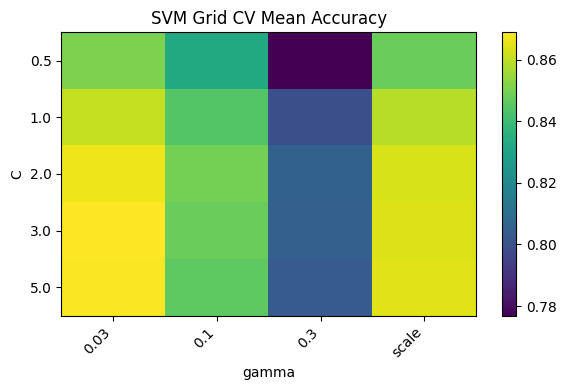

In [18]:
# Compact SVM (RBF) hyperparameter sweep
def to_1d_str(y):
    # If DataFrame, require a single column then squeeze
    if isinstance(y, pd.DataFrame):
        if y.shape[1] != 1:
            raise ValueError(f"y has shape {y.shape}; expected a single column.")
        y = y.iloc[:, 0]
    # Convert to numpy and flatten if needed
    arr = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    if arr.ndim == 2:
        if arr.shape[1] == 1:
            arr = arr[:, 0]
        else:
            arr = arr.reshape(-1)
    return arr.astype(str)

y_train_1d = to_1d_str(y_train)
y_valid_1d = to_1d_str(y_valid)
y_full_1d  = to_1d_str(y_full)
# Pipeline: scale -> SVC(probabilities enabled)
svm_pipe = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])

# Compact grid
param_grid = {
    'model__C':     [0.5, 1, 2, 3, 5],
    'model__gamma': ['scale', 0.03, 0.1, 0.3]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_gs = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=1
)

# Fit on training split
svm_gs.fit(X_train_no_int, y_train_1d)
print("Best params:", svm_gs.best_params_)
print("Best CV mean accuracy:", svm_gs.best_score_)

# Validate
y_pred = svm_gs.predict(X_valid_no_int)
val_acc = accuracy_score(y_valid_1d, y_pred)
print(f"\nValidation Accuracy (tuned SVM): {val_acc:.4f}")

print("\nConfusion Table (rows=Predicted, cols=Truth):")
display(confusion_table(y_pred, y_valid_1d))

print("\nClassification Report:")
print(classification_report(y_valid_1d, y_pred, digits=3))

# Macro AUC (OvR)
est = svm_gs.best_estimator_.named_steps['model']
classes_est = np.array([str(c) for c in est.classes_])
y_proba = svm_gs.predict_proba(X_valid_no_int)
y_valid_bin = label_binarize(y_valid_1d, classes=classes_est)
macro_auc = roc_auc_score(y_valid_bin, y_proba, average='macro')
print(f"Macro ROC AUC (OvR): {macro_auc:.4f}")

# CV results heatmap (mean accuracy)
cvres = pd.DataFrame(svm_gs.cv_results_)
heat = cvres.pivot(index='param_model__C', columns='param_model__gamma', values='mean_test_score')
plt.figure(figsize=(6,4))
plt.imshow(heat.values, aspect='auto')
plt.xticks(range(heat.shape[1]), heat.columns.astype(str), rotation=45, ha='right')
plt.yticks(range(heat.shape[0]), heat.index.astype(str))
plt.title('SVM Grid CV Mean Accuracy')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.tight_layout()
plt.show()



# 8. Start Decision Treen, Bagged Model, Random Forest, & Boosted Model 

In [23]:
#  helper: ensure 1-D string labels
def to_1d_str(y):
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]
    arr = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    if arr.ndim == 2 and arr.shape[1] == 1:
        arr = arr[:, 0]
    return arr.astype(str)

y_train_1d = to_1d_str(y_train)
y_valid_1d = to_1d_str(y_valid)
y_full_1d  = to_1d_str(y_full)

# scoring helper
def eval_model(name, mdl):
    mdl.fit(X_train_no_int, y_train_1d)
    y_pred = mdl.predict(X_valid_no_int)
    acc = accuracy_score(y_valid_1d, y_pred)

    print(f"\n=== {name} ===")
    print(f"Validation Accuracy: {acc:.4f}")

    # ISLP confusion table (rows=Predicted, cols=Truth)
    print("\nConfusion Table (rows=Predicted, cols=Truth):")
    display(confusion_table(y_pred, y_valid_1d))

    print("\nClassification Report:")
    print(classification_report(y_valid_1d, y_pred, digits=3))

    # Macro AUC (OvR) if proba available
    macro_auc = np.nan
    if hasattr(mdl, "predict_proba"):
        proba = mdl.predict_proba(X_valid_no_int)
        classes_est = np.array([str(c) for c in mdl.classes_])
        y_val_bin = label_binarize(y_valid_1d, classes=classes_est)
        macro_auc = roc_auc_score(y_val_bin, proba, average='macro')
        print(f"Macro ROC AUC (OvR): {macro_auc:.4f}")

    return acc, macro_auc, y_pred

## 8.1 Decision Tree 

In [24]:
v = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_base = DecisionTreeClassifier(random_state=42)
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 6, 12],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}
dt_gs = GridSearchCV(dt_base, dt_grid, scoring='accuracy', cv=cv, n_jobs=-1, refit=True, verbose=1)
dt_gs.fit(X_train_no_int, y_train_1d)
dt_best = dt_gs.best_estimator_
print("Decision Tree best params:", dt_gs.best_params_)

dt_acc, dt_auc, _ = eval_model("Decision Tree (tuned)", dt_best)

# Feature importances 
dt_imp = pd.Series(dt_best.feature_importances_, index=X_train_no_int.columns).sort_values(ascending=False).head(20)
print("\nDecision Tree — Top 20 Feature Importances:")
display(dt_imp)

#  plot a shallow view of the tree
fig, ax = plt.subplots(figsize=(10, 6))
plot_tree(dt_best, max_depth=3, feature_names=X_train_no_int.columns, class_names=dt_best.classes_, filled=True, fontsize=6)
plt.tight_layout()
fig.savefig("/kaggle/working/tree_preview.png", dpi=150)
plt.close(fig)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Decision Tree best params: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2}

=== Decision Tree (tuned) ===
Validation Accuracy: 0.8786

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,463,44,1,0,0,2,0
Normal_Weight,41,530,0,0,0,56,10
Obesity_Type_I,0,3,504,30,2,15,54
Obesity_Type_II,0,0,17,617,1,0,4
Obesity_Type_III,0,0,5,1,806,0,0
Overweight_Level_I,1,31,12,0,0,344,52
Overweight_Level_II,0,9,43,2,0,68,384



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.908     0.917     0.912       505
      Normal_Weight      0.832     0.859     0.845       617
     Obesity_Type_I      0.829     0.866     0.847       582
    Obesity_Type_II      0.966     0.949     0.957       650
   Obesity_Type_III      0.993     0.996     0.994       809
 Overweight_Level_I      0.782     0.709     0.744       485
Overweight_Level_II      0.759     0.762     0.760       504

           accuracy                          0.879      4152
          macro avg      0.867     0.866     0.866      4152
       weighted avg      0.878     0.879     0.878      4152

Macro ROC AUC (OvR): 0.9696

Decision Tree — Top 20 Feature Importances:


BMI                                    0.665618
Weight                                 0.182980
Gender[Male]                           0.053703
Age                                    0.021656
CH2O                                   0.014604
FCVC                                   0.011851
Height                                 0.009106
NCP                                    0.007026
TUE                                    0.006256
FAVC[yes]                              0.005611
CALC[no]                               0.005539
FAF                                    0.004170
family_history_with_overweight[yes]    0.002738
CALC[Sometimes]                        0.002147
SCC[yes]                               0.002137
CAEC[Sometimes]                        0.001948
CAEC[Frequently]                       0.001442
CAEC[no]                               0.000800
MTRANS[Walking]                        0.000339
MTRANS[Public_Transportation]          0.000263
dtype: float64

## 8.2 Bagging w/ Decision Tree Model 

In [25]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_acc, bag_auc, _ = eval_model("Bagging (200 trees, OOB enabled)", bag)
if hasattr(bag, "oob_score_"):
    print(f"OOB Score: {bag.oob_score_:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



=== Bagging (200 trees, OOB enabled) ===
Validation Accuracy: 0.8945

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,473,32,1,0,0,1,0
Normal_Weight,31,545,0,0,0,49,10
Obesity_Type_I,0,2,514,24,2,10,48
Obesity_Type_II,0,0,21,624,1,0,1
Obesity_Type_III,0,0,4,1,806,0,0
Overweight_Level_I,1,30,9,0,0,352,45
Overweight_Level_II,0,8,33,1,0,73,400



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.933     0.937     0.935       505
      Normal_Weight      0.858     0.883     0.871       617
     Obesity_Type_I      0.857     0.883     0.870       582
    Obesity_Type_II      0.964     0.960     0.962       650
   Obesity_Type_III      0.994     0.996     0.995       809
 Overweight_Level_I      0.805     0.726     0.764       485
Overweight_Level_II      0.777     0.794     0.785       504

           accuracy                          0.895      4152
          macro avg      0.884     0.883     0.883      4152
       weighted avg      0.894     0.895     0.894      4152

Macro ROC AUC (OvR): 0.9858
OOB Score: 0.8894


## 8.3 Random Forest 

In [26]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_features='sqrt',
    min_samples_leaf=1,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
rf_acc, rf_auc, _ = eval_model("Random Forest (400, sqrt)", rf)
print(f"OOB Score: {rf.oob_score_:.4f}")

rf_imp = pd.Series(rf.feature_importances_, index=X_train_no_int.columns).sort_values(ascending=False).head(20)
print("\nRandom Forest — Top 20 Feature Importances:")
display(rf_imp)




=== Random Forest (400, sqrt) ===
Validation Accuracy: 0.9075

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,483,28,1,0,0,1,0
Normal_Weight,21,559,1,0,0,44,7
Obesity_Type_I,0,1,518,18,2,11,42
Obesity_Type_II,0,0,15,632,1,0,3
Obesity_Type_III,0,0,3,0,806,0,0
Overweight_Level_I,1,22,11,0,0,362,44
Overweight_Level_II,0,7,33,0,0,67,408



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.942     0.956     0.949       505
      Normal_Weight      0.884     0.906     0.895       617
     Obesity_Type_I      0.875     0.890     0.882       582
    Obesity_Type_II      0.971     0.972     0.972       650
   Obesity_Type_III      0.996     0.996     0.996       809
 Overweight_Level_I      0.823     0.746     0.783       485
Overweight_Level_II      0.792     0.810     0.801       504

           accuracy                          0.908      4152
          macro avg      0.898     0.897     0.897      4152
       weighted avg      0.907     0.908     0.907      4152

Macro ROC AUC (OvR): 0.9890
OOB Score: 0.8999

Random Forest — Top 20 Feature Importances:


BMI                                    0.281208
Weight                                 0.237240
Age                                    0.077737
FCVC                                   0.071966
Height                                 0.067295
Gender[Male]                           0.045103
TUE                                    0.034258
CH2O                                   0.033363
FAF                                    0.031221
NCP                                    0.024369
family_history_with_overweight[yes]    0.020741
CALC[Sometimes]                        0.011727
CAEC[Frequently]                       0.011104
CALC[no]                               0.011033
CAEC[Sometimes]                        0.011009
MTRANS[Public_Transportation]          0.009237
FAVC[yes]                              0.008820
SCC[yes]                               0.003767
CAEC[no]                               0.002721
CALC[Frequently]                       0.002578
dtype: float64

## 8.4 Gradient Boosting 

In [27]:
gb_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [1, 2]
}
gb_gs = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, scoring='accuracy', cv=cv, n_jobs=-1, refit=True, verbose=1
)
gb_gs.fit(X_train_no_int, y_train_1d)
gb_best = gb_gs.best_estimator_
print("Gradient Boosting best params:", gb_gs.best_params_)

gb_acc, gb_auc, _ = eval_model("Gradient Boosting (tuned)", gb_best)

gb_imp = pd.Series(gb_best.feature_importances_, index=X_train_no_int.columns).sort_values(ascending=False).head(20)
print("\nGradient Boosting — Top 20 Feature Importances:")
display(gb_imp)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400}

=== Gradient Boosting (tuned) ===
Validation Accuracy: 0.9068

Confusion Table (rows=Predicted, cols=Truth):


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,478,30,1,2,0,1,0
Normal_Weight,25,554,1,0,0,42,6
Obesity_Type_I,1,2,518,19,3,11,38
Obesity_Type_II,0,0,18,629,1,0,4
Obesity_Type_III,0,0,3,0,805,2,0
Overweight_Level_I,1,26,8,0,0,371,46
Overweight_Level_II,0,5,33,0,0,58,410



Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight      0.934     0.947     0.940       505
      Normal_Weight      0.882     0.898     0.890       617
     Obesity_Type_I      0.875     0.890     0.882       582
    Obesity_Type_II      0.965     0.968     0.966       650
   Obesity_Type_III      0.994     0.995     0.994       809
 Overweight_Level_I      0.821     0.765     0.792       485
Overweight_Level_II      0.810     0.813     0.812       504

           accuracy                          0.907      4152
          macro avg      0.897     0.897     0.897      4152
       weighted avg      0.906     0.907     0.906      4152

Macro ROC AUC (OvR): 0.9898

Gradient Boosting — Top 20 Feature Importances:


BMI                                    0.671358
Weight                                 0.162288
Gender[Male]                           0.094399
FCVC                                   0.017721
Age                                    0.016127
CH2O                                   0.008660
NCP                                    0.004068
FAVC[yes]                              0.003928
Height                                 0.003605
TUE                                    0.003431
CAEC[no]                               0.003133
CALC[no]                               0.002880
FAF                                    0.002667
SCC[yes]                               0.001302
family_history_with_overweight[yes]    0.001056
CAEC[Frequently]                       0.001046
CALC[Sometimes]                        0.000743
CALC[Frequently]                       0.000532
CAEC[Sometimes]                        0.000363
MTRANS[Public_Transportation]          0.000240
dtype: float64

## 8.5 Compare Model Validation 

In [28]:
results_tree = pd.DataFrame({
    'model': ['DecisionTree', 'Bagging', 'RandomForest', 'GradientBoosting'],
    'val_accuracy': [dt_acc, bag_acc, rf_acc, gb_acc],
    'macro_auc_ovr': [dt_auc, bag_auc, rf_auc, gb_auc]
}).sort_values('val_accuracy', ascending=False)
print("\n=== Validation Summary (Tree-Based Models) ===")
display(results_tree)


=== Validation Summary (Tree-Based Models) ===


,model,val_accuracy,macro_auc_ovr
2,RandomForest,0.907514,0.989025
3,GradientBoosting,0.906792,0.989754
1,Bagging,0.894509,0.985823
0,DecisionTree,0.878613,0.969587


## 9. Train & Submit Best Model 

In [29]:
os.makedirs("/kaggle/working", exist_ok=True)

# Models and their validation metrics from Section 8
model_objs = {
    'DecisionTree': dt_best,          # tuned GridSearchCV best estimator
    'Bagging': bag,                   # fitted spec
    'RandomForest': rf,               # fitted spec
    'GradientBoosting': gb_best       # tuned GridSearchCV best estimator
}
val_scores = {
    'DecisionTree': dt_acc,
    'Bagging': bag_acc,
    'RandomForest': rf_acc,
    'GradientBoosting': gb_acc
}
auc_scores = {
    'DecisionTree': dt_auc,
    'Bagging': bag_auc,
    'RandomForest': rf_auc,
    'GradientBoosting': gb_auc
}

# Select best by validation accuracy; break ties with macro AUC
best_name = max(val_scores, key=lambda k: (val_scores[k], np.nan_to_num(auc_scores[k], nan=-1.0)))
best_model = model_objs[best_name]

print(f"Best model: {best_name} "
      f"(val acc={val_scores[best_name]:.4f}, macro AUC={auc_scores[best_name]:.4f})")

# Fit BEST model on the FULL training set
best_model.fit(X_full_no_int, y_full_1d)

# Predict test set and save SINGLE Kaggle-ready file
test_pred = best_model.predict(X_test_no_int)
submission = pd.DataFrame({'id': test['id'], 'NObeyesdad': test_pred})
out_path = "/kaggle/working/submission.csv"
submission.to_csv(out_path, index=False)
print("Saved single submission:", out_path)

Best model: RandomForest (val acc=0.9075, macro AUC=0.9890)
Saved single submission: /kaggle/working/submission.csv
